# Analisis de Retención de Empleados

## Objetivos del análisis exploratorio de datos:

Descripción del Proyecto: 

Analizar datos de recursos humanos de una empresa para
identificar factores que influyen en la retención de empleados y desarrollar
estrategias de retención efectivas.

- Identificar patrones y tendencias en los datos.
- Entender la distribución de las variables.
- Evaluar la correlación entre variables.

## Import Globales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

## Carga de datos 

In [3]:
df_employee = pd.read_csv("Datasets/Employee_office_survey.csv")

In [4]:
df_employee_hr = pd.read_csv("Datasets/HR Employee data.csv")

In [5]:
df_job_position = pd.read_csv("Datasets/Job_position_structure.csv")

In [6]:
df_office_codes = pd.read_csv("Datasets/Office_codes.csv")

## Exploración inicial de los datos

### Employe office survey

In [7]:
df_employee

,emp_id,off_cde,rated_year,rating
0,100000,BOS,2017,8.0
1,100000,BOS,2018,7.5
2,100000,BOS,2019,6.0
3,100001,NYC,2017,6.0
4,100001,NYC,2018,7.0
...,...,...,...,...
47102,113420,OTT,2022,9.5
47103,113421,TOR,2021,10.0
47104,113421,TOR,2022,9.5
47105,113422,VAN,2021,8.5


In [8]:
df_employee.head(10)

,emp_id,off_cde,rated_year,rating
0,100000,BOS,2017,8.0
1,100000,BOS,2018,7.5
2,100000,BOS,2019,6.0
3,100001,NYC,2017,6.0
4,100001,NYC,2018,7.0
5,100002,OTT,2017,8.5
6,100002,OTT,2018,8.5
7,100003,NYC,2017,7.0
8,100003,NYC,2018,8.0
9,100003,NYC,2019,6.5


In [9]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107 entries, 0 to 47106
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   emp_id      47107 non-null  int64  
 1   off_cde     47107 non-null  object 
 2   rated_year  47107 non-null  int64  
 3   rating      47107 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


In [10]:
df_employee.describe()

,emp_id,rated_year,rating
count,47107.000000,47107.000000,47107.000000
mean,105686.760481,2020.235995,8.309487
std,3732.116563,1.466009,1.146675
min,100000.000000,2017.000000,3.000000
25%,102475.000000,2019.000000,7.500000
50%,105283.000000,2020.000000,8.500000
75%,108725.000000,2021.000000,9.000000
max,113422.000000,2022.000000,10.000000


In [11]:
df_employee.isnull().sum()

emp_id        0
off_cde       0
rated_year    0
rating        0
dtype: int64

Distribucion general de los Ratings:

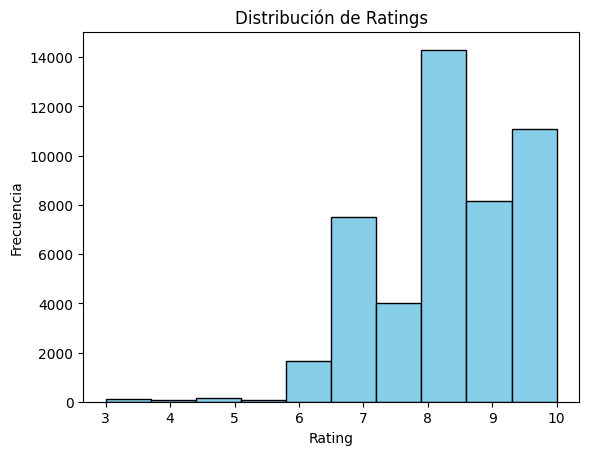

In [12]:
plt.hist(df_employee['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Ratings')
plt.show()

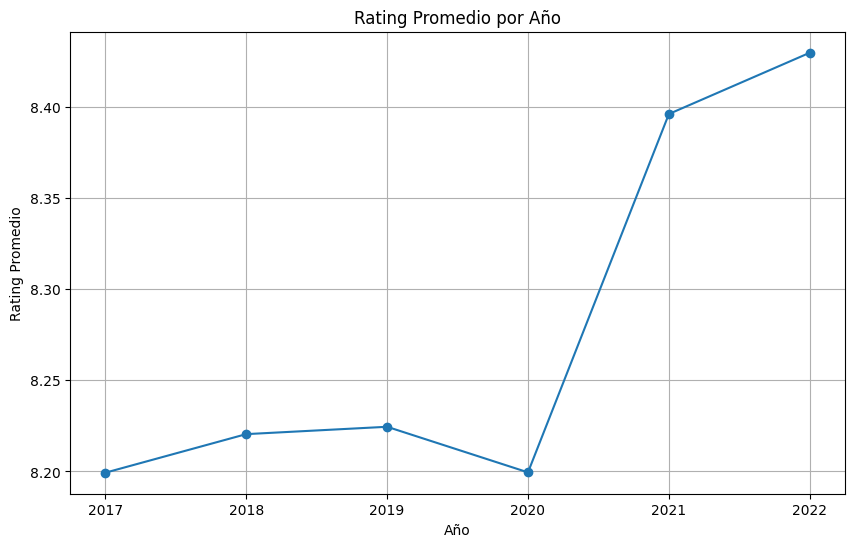

In [13]:
plt.figure(figsize=(10, 6))
ratings_by_year = df_employee.groupby('rated_year')['rating'].mean()
plt.plot(ratings_by_year.index, ratings_by_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio por Año')
plt.xticks(ratings_by_year.index)
plt.grid(True)
plt.show()

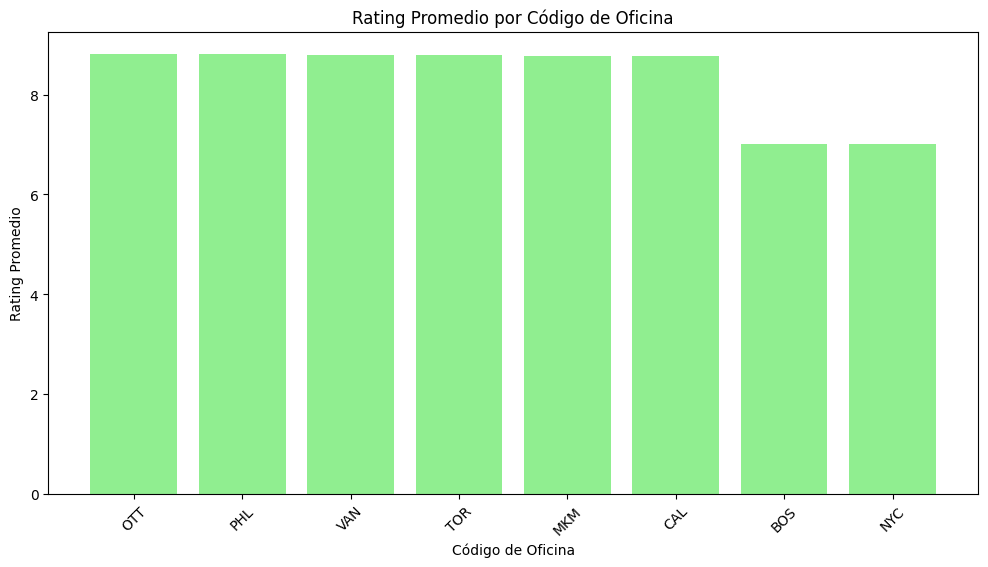

In [14]:
plt.figure(figsize=(12, 6))
ratings_by_office = df_employee.groupby('off_cde')['rating'].mean().sort_values(ascending=False)
plt.bar(ratings_by_office.index, ratings_by_office.values, color='lightgreen')
plt.xlabel('Código de Oficina')
plt.ylabel('Rating Promedio')
plt.title('Rating Promedio por Código de Oficina')
plt.xticks(rotation=45)
plt.show()


In [15]:
fig = px.scatter(df_employee, x='rated_year', y='rating', color='rated_year',
                 title='Gráfico de Dispersión de Ratings por Año',
                 labels={'rated_year': 'Año', 'rating': 'Rating'})

fig.update_layout(xaxis=dict(tickangle=45),
                  yaxis=dict(title='Rating'),
                  legend_title='Año')

fig.show()


### HR Employee data

In [16]:
df_employee_hr

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,1,240,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13419,113419,2021,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,1,1919,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L1
13420,113420,2021,36,Travel_Rarely,927,Product,5,Diploma,1,108,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13421,113421,2021,58,Travel_Rarely,1200,Sales,14,Bachelors,1,1836,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L4


In [17]:
df_employee_hr.head()

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
0,100000,2005,57,Travel_Rarely,164,Corporate Functions,22,Doctorate,1,217,...,14,4,5,3,Yes,2019.0,long hours,Voluntary,BOS,L7
1,100001,2006,52,Travel_Rarely,265,Corporate Functions,19,Doctorate,1,519,...,12,4,5,3,Yes,2018.0,medical issues,Voluntary,NYC,L6
2,100002,2006,53,Travel_Rarely,607,Corporate Functions,2,Doctorate,1,1572,...,12,3,1,4,Yes,2018.0,retiring,Voluntary,OTT,L6
3,100003,2006,54,Travel_Rarely,215,Corporate Functions,19,Diploma,1,309,...,13,4,5,3,Yes,2019.0,career change,Voluntary,NYC,L7
4,100004,2007,57,Travel_Rarely,285,Marketing,2,Diploma,1,828,...,11,5,5,3,Yes,2018.0,retiring,Voluntary,CAL,L5


In [18]:
df_employee_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [19]:
df_employee_hr.columns

Index(['EmployeeID', 'JoiningYear', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition', 'LeavingYear', 'Reason', 'RelievingStatus', 'office_code',
       'JobLevel_updated'],
      dtype='object')

In [20]:
df_employee_hr.describe()

,EmployeeID,JoiningYear,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,LeavingYear
count,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.0,13423.000000,13423.000000,13423.000000,13423.00000,...,13423.0,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,13423.000000,3198.000000
mean,106711.000000,2018.825300,36.159949,803.998287,8.881472,1.0,1022.222677,2.369366,65.498622,2.46316,...,80.0,0.500410,10.572227,2.454518,2.496908,2.791626,1.898979,1.396037,1.873501,2020.392120
std,3875.030667,2.005345,8.126696,356.968483,6.844715,0.0,549.883093,0.941861,17.196420,0.66039,...,0.0,0.664563,7.246988,1.069622,0.656888,1.860029,1.039347,0.818350,1.004282,1.420644
min,100000.000000,2005.000000,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.00000,...,80.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000
25%,103355.500000,2018.000000,30.000000,514.500000,3.000000,1.0,554.000000,2.000000,52.000000,2.00000,...,80.0,0.000000,6.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2019.000000
50%,106711.000000,2019.000000,35.000000,800.000000,7.000000,1.0,1014.000000,2.000000,65.000000,3.00000,...,80.0,0.000000,9.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2021.000000
75%,110066.500000,2020.000000,41.000000,1106.000000,13.000000,1.0,1493.000000,3.000000,79.000000,3.00000,...,80.0,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2022.000000
max,113422.000000,2021.000000,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.00000,...,80.0,3.000000,40.000000,6.000000,4.000000,15.000000,7.000000,6.000000,6.000000,2022.000000


In [21]:
df_employee_hr.isnull().sum()

EmployeeID                      0
JoiningYear                     0
Age                             0
BusinessTravel                  0
DailyRate                       0
Department                      0
DistanceFromHome                0
EducationField                  0
EmployeeCount                   0
EmployeeNumber                  0
EnvironmentSatisfaction         0
Gender                          0
HourlyRate                      0
JobInvolvement                  0
JobSatisfaction                 0
MaritalStatus                   0
MonthlyIncome                   0
MonthlyRate                     0
NumCompaniesWorked              0
Over18                          0
OverTime                        0
PercentSalaryHike               0
PerformanceRating               0
RelationshipSatisfaction        0
StandardHours                   0
StockOptionLevel                0
TotalWorkingYears               0
TrainingTimesLastYear           0
WorkLifeBalance                 0
YearsAtCompany

In [22]:
df_employee_hr[df_employee_hr.isna().any(axis=1)]

,EmployeeID,JoiningYear,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,LeavingYear,Reason,RelievingStatus,office_code,JobLevel_updated
18,100018,2009,55,Travel_Rarely,685,Corporate Functions,26,Diploma,1,1578,...,13,3,1,5,No,NaN,NaN,NaN,VAN,L7
20,100020,2009,58,Travel_Rarely,682,Corporate Functions,10,Masters,1,131,...,13,4,1,3,No,NaN,NaN,NaN,CAL,L7
23,100023,2009,54,Travel_Rarely,685,Corporate Functions,25,Masters,1,1556,...,13,2,1,5,No,NaN,NaN,NaN,BOS,L7
24,100024,2009,56,Travel_Rarely,618,Sales,12,Masters,1,386,...,13,4,2,3,No,NaN,NaN,NaN,VAN,L4
26,100026,2009,54,Travel_Rarely,689,Corporate Functions,25,Masters,1,1542,...,13,2,1,5,No,NaN,NaN,NaN,TOR,L7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13418,113418,2021,36,Travel_Frequently,1266,Corporate Functions,9,Diploma,1,240,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13419,113419,2021,31,Travel_Rarely,424,Corporate Functions,6,Bachelors,1,1919,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L1
13420,113420,2021,36,Travel_Rarely,927,Product,5,Diploma,1,108,...,1,1,1,1,No,NaN,NaN,NaN,OTT,L1
13421,113421,2021,58,Travel_Rarely,1200,Sales,14,Bachelors,1,1836,...,1,1,1,1,No,NaN,NaN,NaN,TOR,L4


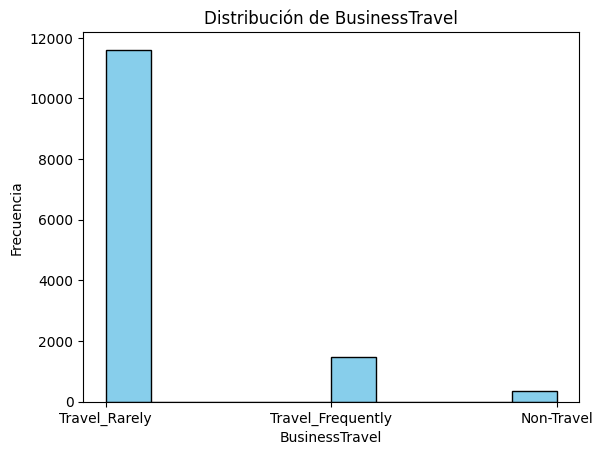

In [23]:
plt.hist(df_employee_hr['BusinessTravel'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('BusinessTravel')
plt.ylabel('Frecuencia')
plt.title('Distribución de BusinessTravel')
plt.show()

In [24]:
df_employee_hr["Reason"].to_list()

['long hours',
 'medical issues',
 'retiring',
 'career change',
 'retiring',
 'retiring',
 'retiring',
 'return to school',
 'Misconduct',
 'long hours',
 'retiring',
 'offered more money',
 'career change',
 'long hours',
 'retiring',
 'unhappy',
 'retiring',
 'long hours',
 nan,
 'retiring',
 nan,
 'reallocation out of the area',
 'unhappy',
 nan,
 nan,
 'retiring',
 nan,
 nan,
 'offered more money',
 'unhappy',
 nan,
 'long hours',
 'return to school',
 nan,
 nan,
 'unhappy',
 'long hours',
 nan,
 'medical issues',
 'reallocation out of the area',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'career change',
 'reallocation out of the area',
 nan,
 'unhappy',
 'unhappy',
 nan,
 'career change',
 nan,
 nan,
 nan,
 'medical issues',
 'unhappy',
 'offered more money',
 nan,
 'Misconduct',
 nan,
 nan,
 'career change',
 nan,
 'Misconduct',
 'reallocation out of the area',
 'career change',
 nan,
 nan,
 'unhappy',
 'retiring',
 nan,
 'maternity leave - did not return',
 'long hours',
 'career ch

In [25]:
df_employee_hr["Reason"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13423 entries, 0 to 13422
Series name: Reason
Non-Null Count  Dtype 
--------------  ----- 
3198 non-null   object
dtypes: object(1)
memory usage: 105.0+ KB


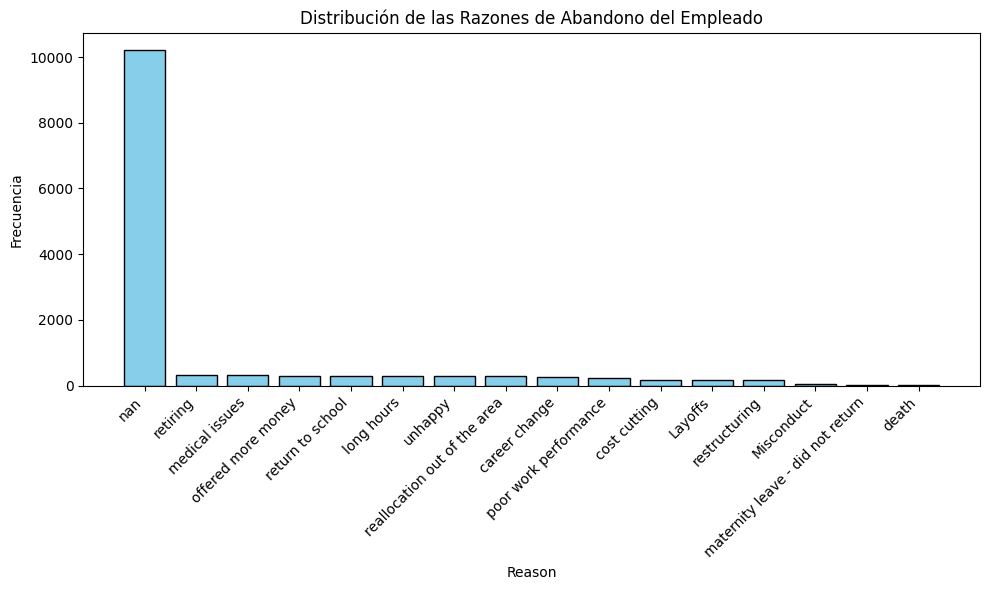

In [26]:
df_employee_hr['Reason'] = df_employee_hr['Reason'].astype(str)

reason_counts = df_employee_hr['Reason'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(reason_counts.index, reason_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Reason')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Razones de Abandono del Empleado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_employee_hr_sin_null = df_employee_hr.copy()

In [28]:
df_employee_hr_sin_null = df_employee_hr.dropna()

/tmp/ipykernel_7473/1407039908.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



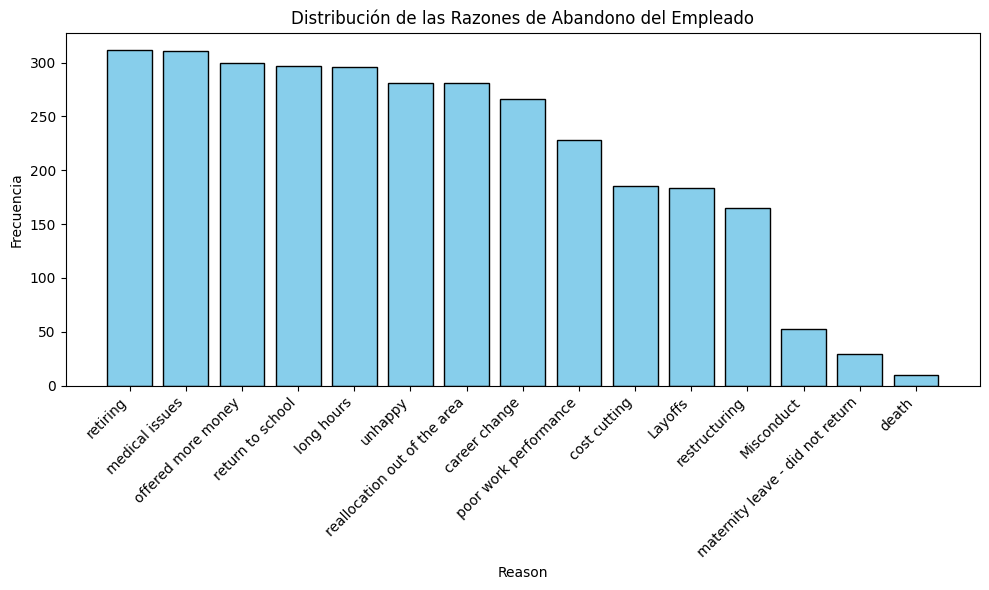

In [29]:
df_employee_hr_sin_null['Reason'] = df_employee_hr_sin_null['Reason'].astype(str)

reason_counts = df_employee_hr_sin_null['Reason'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(reason_counts.index, reason_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Reason')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Razones de Abandono del Empleado')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

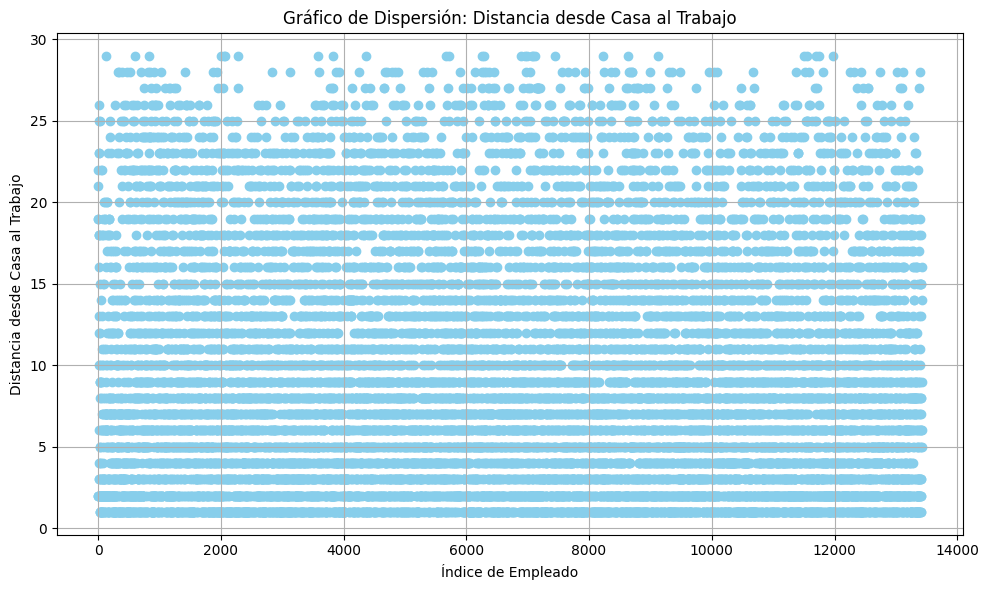

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_employee_hr['DistanceFromHome'])), df_employee_hr['DistanceFromHome'], color='skyblue')
plt.xlabel('Índice de Empleado')
plt.ylabel('Distancia desde Casa al Trabajo')
plt.title('Gráfico de Dispersión: Distancia desde Casa al Trabajo')
plt.grid(True)
plt.tight_layout()
plt.show()

### Job Position

In [31]:
df_job_position

,Department,JobLevel,JobRole
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager
5,Corporate Functions,L6,Director
6,Corporate Functions,L7,Vice President (VP) or Chief Officer
7,Marketing,L1,Coordinator
8,Marketing,L2,Specialist
9,Marketing,L3,Marketing Analyst


In [32]:
df_job_position.head()

,Department,JobLevel,JobRole
0,Corporate Functions,L1,Administrative Assistant
1,Corporate Functions,L2,Administrative Coordinator
2,Corporate Functions,L3,Administrative Specialist
3,Corporate Functions,L4,Administrative Analyst
4,Corporate Functions,L5,Administrative Manager


In [33]:
df_job_position.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  32 non-null     object
 1   JobLevel    32 non-null     object
 2   JobRole     32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes


In [34]:
df_job_position.describe()

,Department,JobLevel,JobRole
count,32,32,32
unique,6,7,32
top,Corporate Functions,L1,Administrative Assistant
freq,7,6,1


In [35]:
df_job_position.isnull().sum()

Department    0
JobLevel      0
JobRole       0
dtype: int64

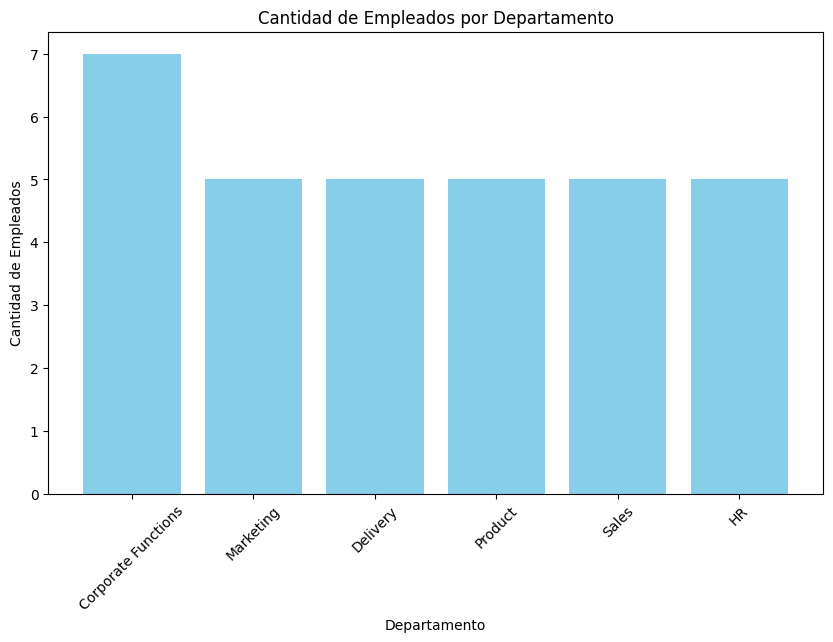

In [36]:
department_counts = df_job_position['Department'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(department_counts.index, department_counts.values, color='skyblue')
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.title('Cantidad de Empleados por Departamento')
plt.xticks(rotation=45)
plt.show()

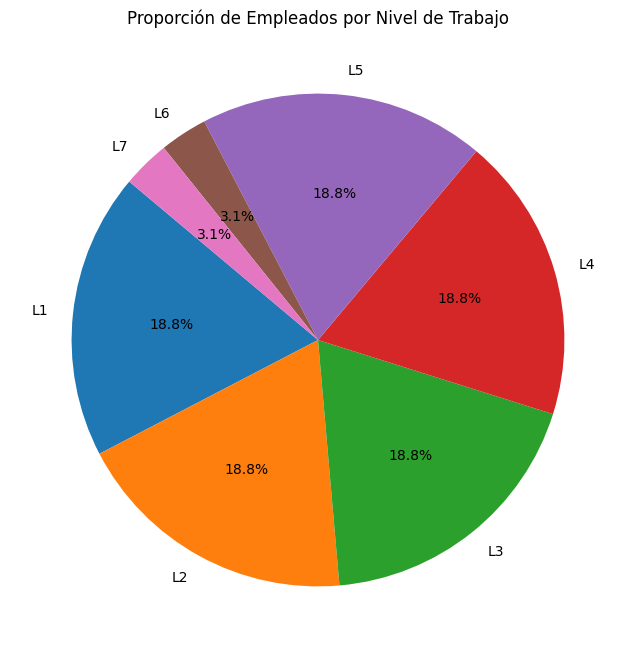

In [37]:
joblevel_counts = df_job_position['JobLevel'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(joblevel_counts.values, labels=joblevel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Empleados por Nivel de Trabajo')
plt.show()


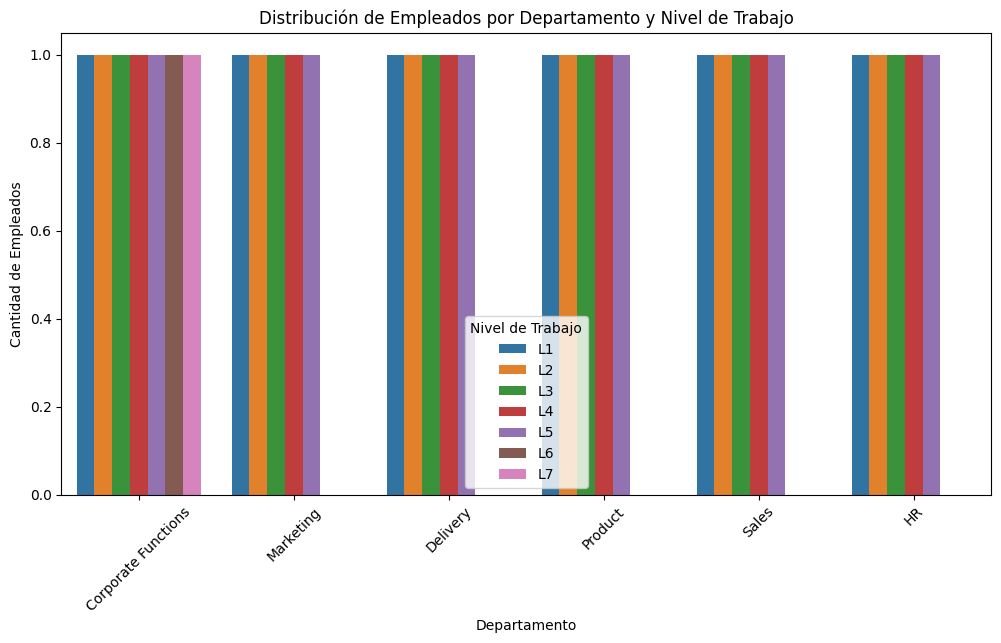

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='JobLevel', data=df_job_position)
plt.xlabel('Departamento')
plt.ylabel('Cantidad de Empleados')
plt.title('Distribución de Empleados por Departamento y Nivel de Trabajo')
plt.xticks(rotation=45)
plt.legend(title='Nivel de Trabajo')
plt.show()

### Office Code

In [39]:
df_office_codes

,office_code,city,province,country
0,TOR,Toronto,ON,Canada
1,MKM,Markham,ON,Canada
2,CAL,Calgary,AB,Canada
3,OTT,Ottawa,ON,Canada
4,VAN,Vancouver,BC,Canada
5,NYC,NewYork,NY,US
6,BOS,Boston,MA,US
7,PHL,Philadelphia,PA,US


In [40]:
df_office_codes.head()

,office_code,city,province,country
0,TOR,Toronto,ON,Canada
1,MKM,Markham,ON,Canada
2,CAL,Calgary,AB,Canada
3,OTT,Ottawa,ON,Canada
4,VAN,Vancouver,BC,Canada


In [41]:
df_office_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   office_code  8 non-null      object
 1   city         8 non-null      object
 2   province     8 non-null      object
 3   country      8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [42]:
df_office_codes.describe()

,office_code,city,province,country
count,8,8,8,8
unique,8,8,6,2
top,TOR,Toronto,ON,Canada
freq,1,1,3,5


In [43]:
df_office_codes.isnull().sum()

office_code    0
city           0
province       0
country        0
dtype: int64

## Conclusiones Finales

### Hallazgos claves

- Se vio un incremento en el raiting a partir del 2020.
- Se observo que las oficinas BOS y NYC tienen menor promedio de rainting con respecto a las demas, que corresponden a New York y Boston en EE.UU.
- se observo que los niveles mas altos L6 y L7 solo estan presentes en "Corporate Fuctions"
- Debe analizarse las razones por las que abandonan el empleo, siendo esta la unica columna con datos nulos.
- Hacer coincidir los nombres de las columnas


### Recomendaciones